In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

custom_colors = ["#c8e7ff","#deaaff", "#f72585","#d100d1"]

In [76]:
# Load the data
df = pd.read_csv('data/Preprocessed data refactor.csv')
df.head()

,"Q1r1 - To begin, what is your age?","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage",...,Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Almost always (greater than 75% of the time),Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Almost never,Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Always (close to 100% of the time),Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Frequently (between 50% and 75% of the time),Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Rarely (10%-50% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Almost always (greater than 75% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Almost never,Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Always (close to 100% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Frequently (between 50% and 75% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Rarely (10%-50% of the time)
0,26.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,25.0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,16.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,32.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


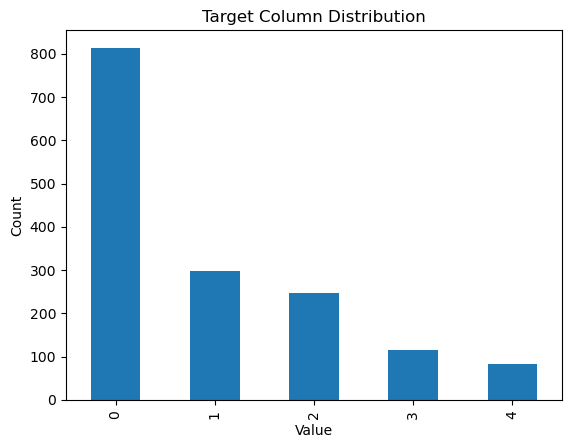

In [4]:
target_col = 'Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'

df.drop(columns="Q26 - Which of the following subscriptions does your household purchase?-Home internet", inplace=True)

# Count the number of occurrences of each unique value in the target column
counts = df[target_col].value_counts()

# Create a bar plot of the counts
counts.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Target Column Distribution')
plt.xlabel('Value')
plt.ylabel('Count')

# Display the plot
plt.show()

In [16]:
def train_model(X, y, model):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    train_accs = []
    test_accs = []
    predicted_targets = np.array([])
    actual_targets = np.array([])

    for fold, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        # train_acc = accuracy_score(y_train, train_predictions)
        # test_acc = accuracy_score(y_test, test_predictions)
        train_f1 = f1_score(y_train, train_predictions, average='weighted')
        test_f1 = f1_score(y_test, test_predictions, average='weighted')

        # train_accs.append(train_acc)
        # test_accs.append(test_acc)
        train_accs.append(train_f1)
        test_accs.append(test_f1)

        predicted_targets = np.append(predicted_targets, test_predictions)
        actual_targets = np.append(actual_targets, y_test)

    return train_accs, test_accs, predicted_targets, actual_targets

X = df.drop(target_col, axis=1)
y = df[target_col]

models = [
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Bagging Decision Tree", BaggingClassifier(base_estimator=DecisionTreeClassifier())),
    ("Boosted Decision Tree", AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
    ("Random Forest", RandomForestClassifier()),
    ("Voting Classification", VotingClassifier(estimators=[('lr', LogisticRegression()), ('knn', KNeighborsClassifier()), ('svc', SVC()), ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier())])),
    ("Neural Network", MLPClassifier())
]


def evaluate(name, model):
    train_accs, test_accs, predicted_targets, actual_targets = train_model(X, y, model)
    train_avg_acc = np.mean(train_accs)
    test_avg_acc = np.mean(test_accs)
    # print("\n" + name +  " Accuracy (Train) across all folds: ", train_avg_acc)
    # print( name +  " Accuracy (Test) across all folds: ", test_avg_acc)
    print(f"{name} f1 (train) across all folds: {train_avg_acc:.4f}")
    print(f"{name} f1 (test) across all folds: {test_avg_acc:.4f}")
    print()

    # print("\n" + name +  " F1 (Train) across all folds: ", train_avg_acc)
    # print( name +  " F1 (Test) across all folds: ", test_avg_acc)

"""
for name, model in models:

    train_accs, test_accs, predicted_targets, actual_targets = train_model(X, y, model)

    # calculating the average accuracy over all folds for each model
    train_avg_acc = np.mean(train_accs)
    test_avg_acc = np.mean(test_accs)

    print("\n" + name +  " Accuracy (Train) across all folds: ", train_avg_acc)
    print( name +  " Accuracy (Test) across all folds: ", test_avg_acc)
"""
pass

In [22]:
class_weight = {0: 0.8, 1: 1, 2: 1, 3: 1, 4: 1}
best_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, class_weight=class_weight), n_estimators=80)
evaluate("test", best_model)

test f1 (train) across all folds: 0.5330
test f1 (test) across all folds: 0.4898



In [87]:
class_weight = {0: 0.2, 1: 1, 2: 1, 3: 1, 4: 1}
best_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, class_weight=class_weight), n_estimators=80)
evaluate("test", best_model)

test f1 (train) across all folds: 0.4862
test f1 (test) across all folds: 0.4326



(array([981., 208., 179.,  89., 101.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

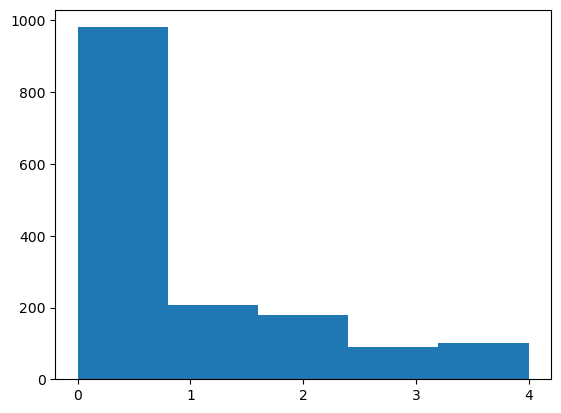

In [29]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, class_weight=class_weight), n_estimators=80)
train_accs, test_accs, predicted_targets, actual_targets = train_model(X, y, model)
plt.xticks([0, 1, 2, 3, 4])
plt.hist(predicted_targets, bins=5)
#plt.hist(actual_targets, bins=5)

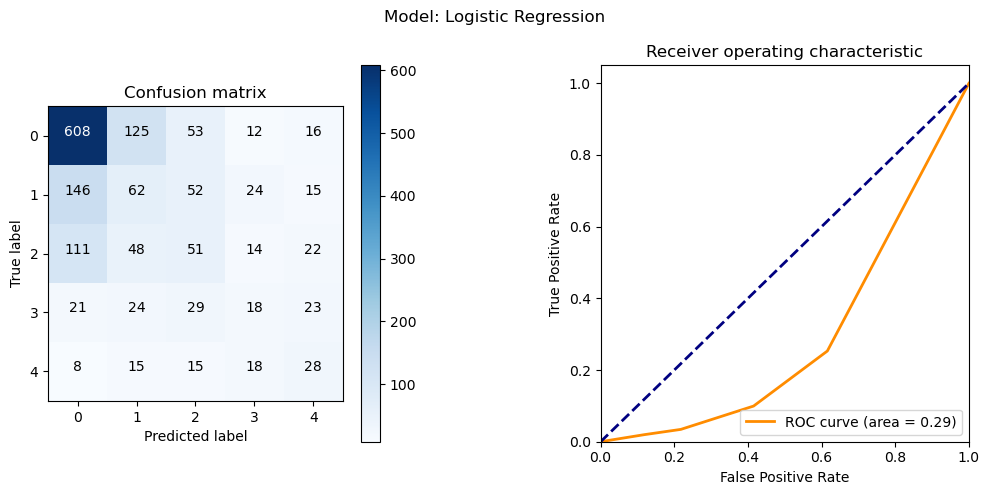

In [88]:
class_names = [0, 1, 2, 3, 4]
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, class_weight={0: 0.5, 1: 1, 2: 1, 3: 1, 4: 1}), n_estimators=80)
train_accs, test_accs, predicted_targets, actual_targets  = train_model(X, y, model)
cm = confusion_matrix(actual_targets, predicted_targets)

classes = [0,1, 2, 3, 4]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix
im = ax[0].imshow(cm, cmap=plt.get_cmap('Blues'))
ax[0].set_title("Confusion matrix")
fig.colorbar(im, ax=ax[0])

tick_marks = np.arange(len(classes))
ax[0].set_xticks(tick_marks)
ax[0].set_xticklabels(classes)
ax[0].set_yticks(tick_marks)
ax[0].set_yticklabels(classes)
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')

fmt = 'd'
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax[0].text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# Calculate precision, recall, and F1 score, AUC-ROC score
precision = precision_score(actual_targets, predicted_targets, average='weighted')
recall = recall_score(actual_targets, predicted_targets, average='weighted')
f1 = f1_score(actual_targets, predicted_targets, average='weighted')

# Plot ROC curve
fpr, tpr, _ = roc_curve(actual_targets, predicted_targets, pos_label=0)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver operating characteristic')
ax[1].legend(loc="lower right")

plt.suptitle("Model: Logistic Regression")
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

In [63]:
# Create a logistic regression model
lr = LogisticRegression(multi_class='multinomial')

# Perform k-fold cross-validation with permutation feature importance
cv_results = cross_validate(lr, X, y, cv=5, scoring='f1_weighted',
                            return_estimator=True, return_train_score=True)

# Compute permutation feature importance for each fold
importance_scores = []
for estimator in cv_results['estimator']:
    result = permutation_importance(estimator, X, y, scoring='accuracy',
                                    n_repeats=10, random_state=0)
    importance_scores.append(result.importances_mean)

# Aggregate feature importance scores across folds
mean_importance = np.mean(importance_scores, axis=0)
std_importance = np.std(importance_scores, axis=0)

# Sort features by mean importance score
feature_importance = sorted(zip(X.columns, mean_importance, std_importance),
                            key=lambda x: x[1], reverse=True)

In [64]:
cv_results

{'fit_time': array([0.10931587, 0.09345388, 0.09364605, 0.09277487, 0.08742094]),
 'score_time': array([0.00233221, 0.00200415, 0.002177  , 0.00211501, 0.00278091]),
 'estimator': [LogisticRegression(multi_class='multinomial'),
  LogisticRegression(multi_class='multinomial'),
  LogisticRegression(multi_class='multinomial'),
  LogisticRegression(multi_class='multinomial'),
  LogisticRegression(multi_class='multinomial')],
 'test_score': array([0.40984527, 0.4236644 , 0.39164167, 0.42333737, 0.44005316]),
 'train_score': array([0.45357174, 0.4305314 , 0.45233246, 0.42903728, 0.4266241 ])}

In [65]:
sorted(feature_importance, key=lambda x: x[1])[-10:][::-1]

[('Q1r1 - To begin, what is your age?',
  0.03594351732991012,
  0.009643461683739047),
 ('Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
  0.008985879332477518,
  0.0026597632836711954),
 ('Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
  0.006495507060333738,
  0.0006307121179223784),
 ('Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-I do not use any of the above types of apps on a frequent (everyday/weekly) basis.',
  0.005404364569961473,
  0.00206168300092284),
 ('Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
  0.005288831835686747,
  0.002877772789566532),
 ('Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
  0.005147625160462111,
  0.00

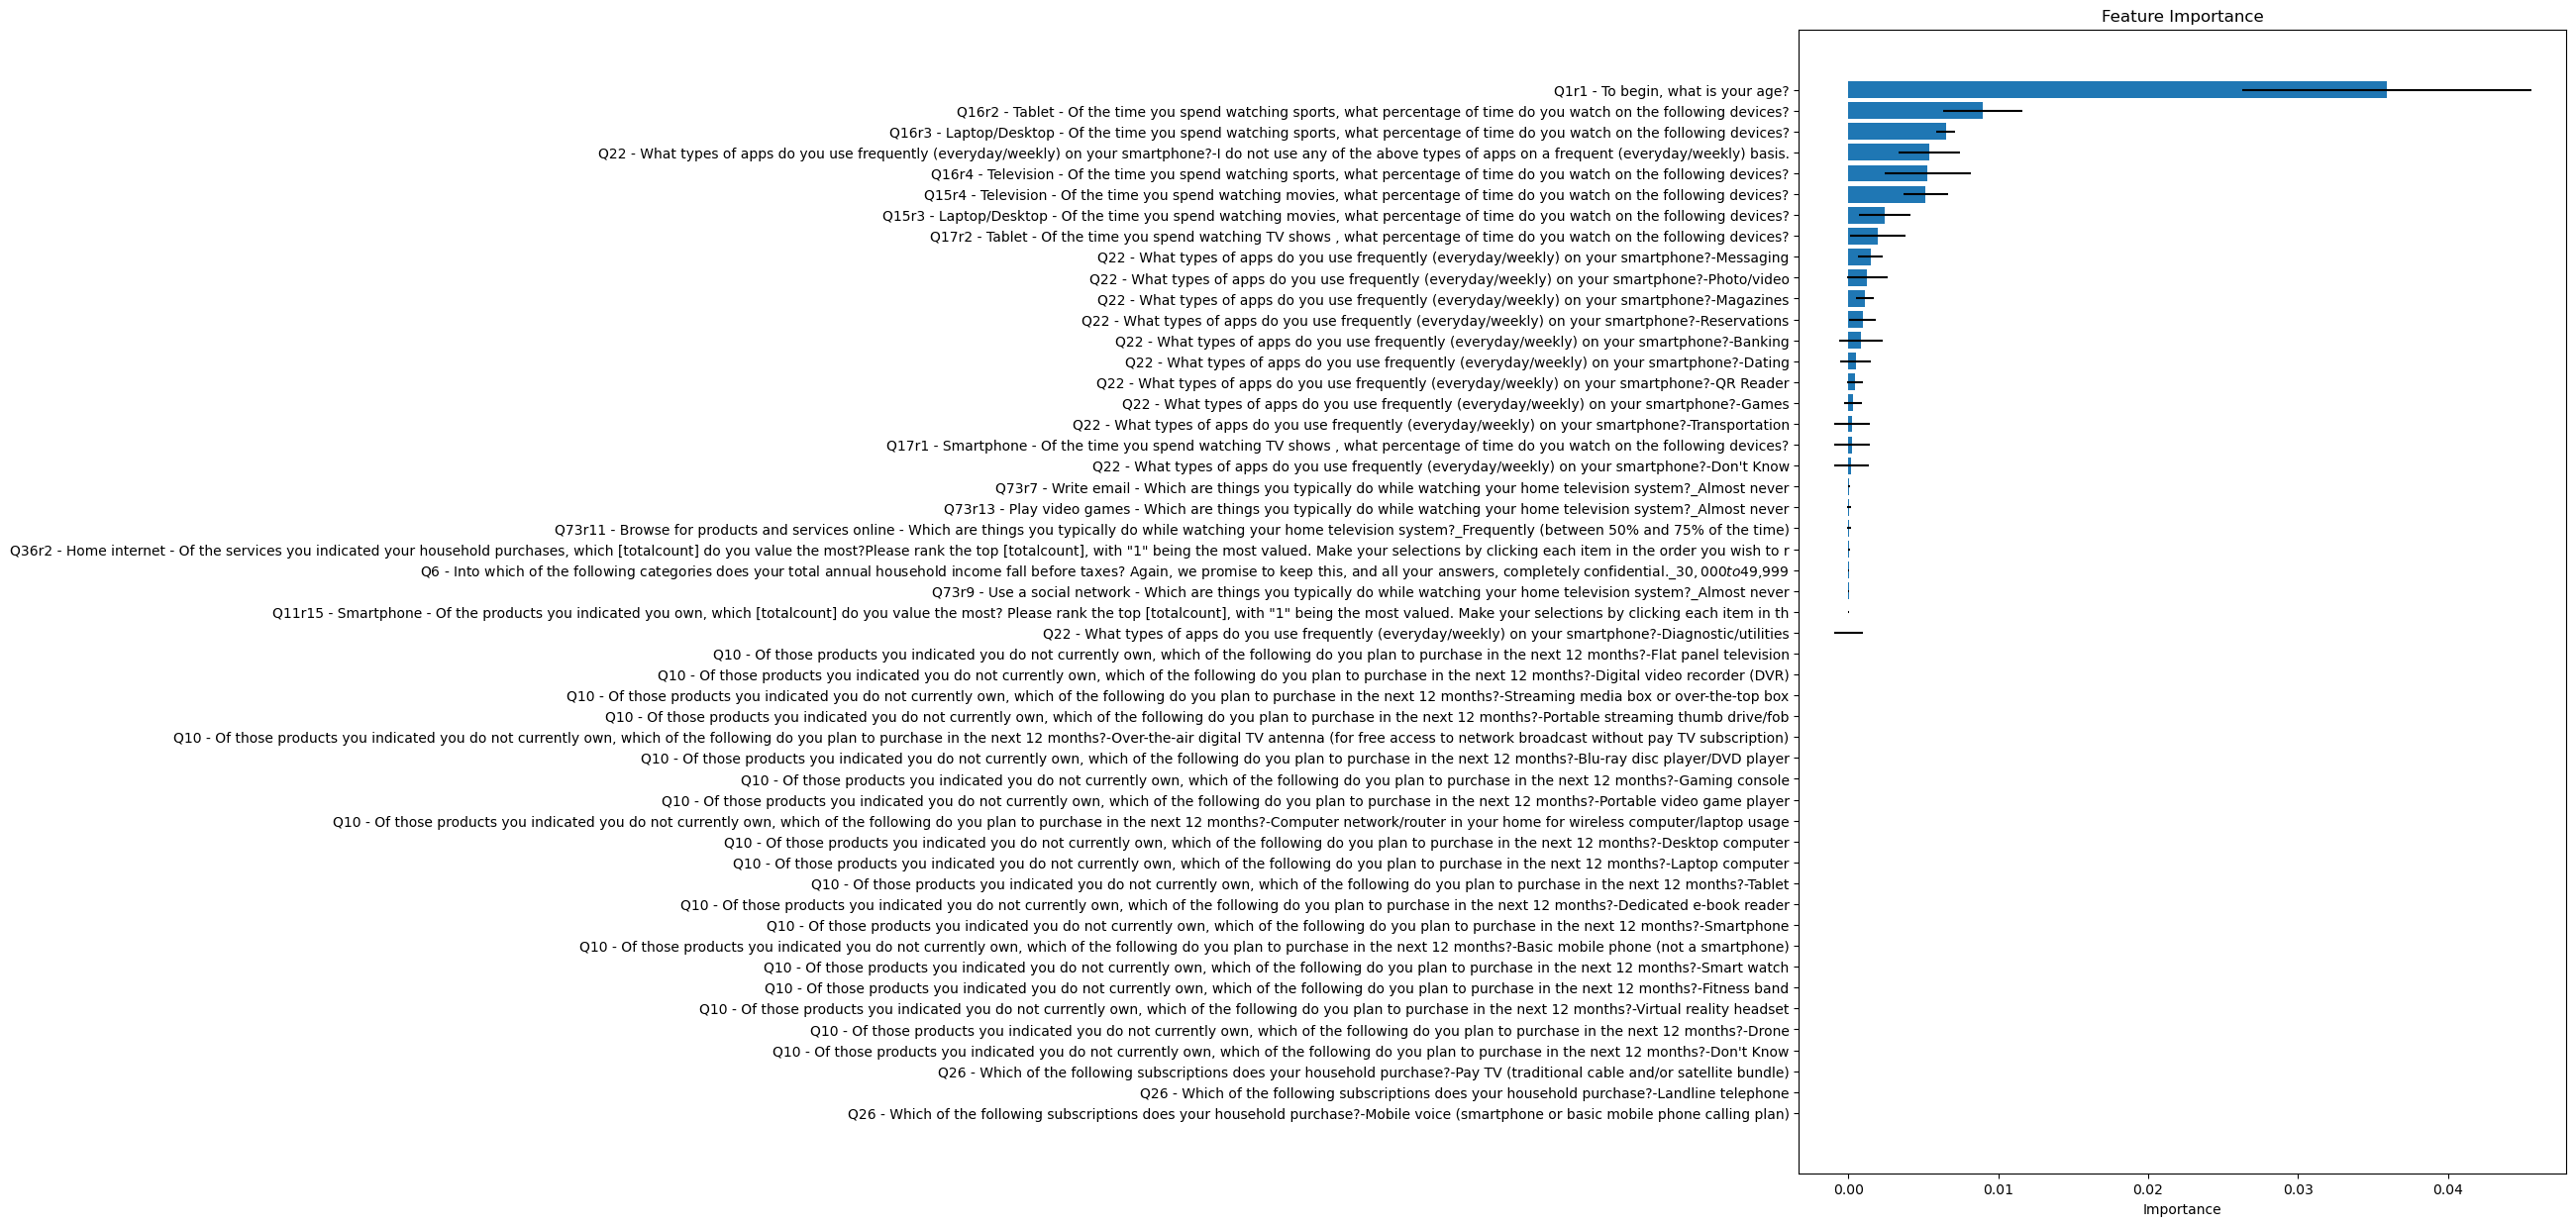

In [66]:
# Get feature names and importance scores
features = [f[0] for f in feature_importance[:50]]
importance = [f[1] for f in feature_importance[:50]]
std = [f[2] for f in feature_importance[:50]]

# Plot feature importance as a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,15))
ax.barh(features, importance, xerr=std, align='center')
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [90]:
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler # For StandardScalar feature
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [92]:
pca = PCA()
df_feature = df.drop(target_col, axis=1)
pca.fit(df_feature)

PCA()

In [93]:
pca.explained_variance_ratio_ # The variances explained by each of the attributes.

array([9.98410972e-01, 8.62062968e-04, 2.07288086e-04, 1.34621970e-04,
       9.02300683e-05, 7.11623984e-05, 5.71188592e-05, 4.72952308e-05,
       3.22521428e-05, 2.94845320e-05, 1.97115421e-05, 1.49192758e-05,
       1.23420115e-05, 7.96940881e-06, 2.11720381e-07, 1.98210054e-07,
       1.37975776e-07, 1.33436132e-07, 1.15941470e-07, 7.90687064e-08,
       6.68362151e-08, 5.20074327e-08, 5.14286788e-08, 4.30619210e-08,
       4.14308052e-08, 4.04255321e-08, 3.70633644e-08, 3.46381700e-08,
       3.25536353e-08, 3.17797249e-08, 3.12309657e-08, 2.96458727e-08,
       2.92676161e-08, 2.86010541e-08, 2.69384926e-08, 2.53488977e-08,
       2.50640029e-08, 2.41291902e-08, 2.39500914e-08, 2.32703908e-08,
       2.26839548e-08, 2.25496243e-08, 2.17902162e-08, 2.13956077e-08,
       2.08883872e-08, 2.04468543e-08, 2.01695209e-08, 2.00491112e-08,
       1.88819087e-08, 1.88468240e-08, 1.79998219e-08, 1.78933495e-08,
       1.72730979e-08, 1.67936104e-08, 1.65635944e-08, 1.62173916e-08,
      

Text(0, 0.5, 'Cumulative Explained Variance')

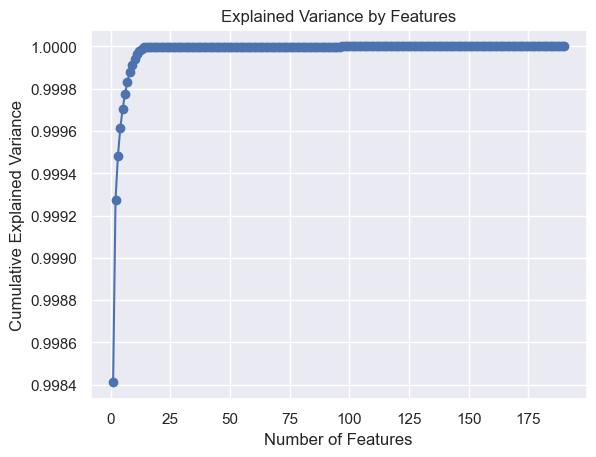

In [97]:
plt.figure()
plt.plot(range(1,191), pca.explained_variance_ratio_.cumsum(),marker = 'o')
plt.title('Explained Variance by Features')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')


In [98]:
pca = PCA(n_components = 5)
pca.fit(df_feature)
pca_score = pca.transform(df_feature)

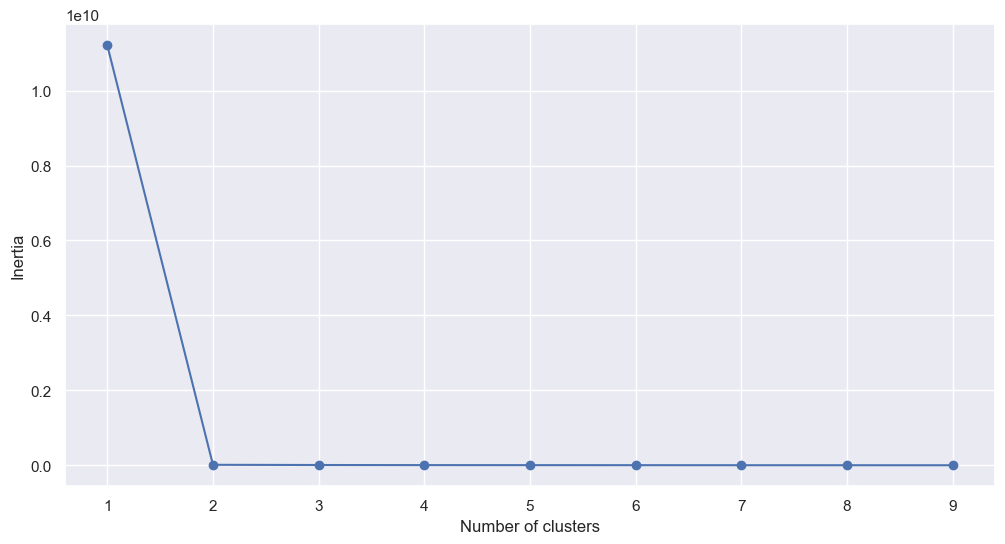

In [99]:
wss = []
for cluster in range(1,10):
    kmeans_pca = KMeans(n_clusters = cluster, init='k-means++')
    kmeans_pca.fit(pca_score)
    wss.append(kmeans_pca.inertia_)
# plot the results
plt.figure(figsize=(12,6))
plt.plot(range(1,10), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [100]:
# Now we run k-means with 2 clusters.
kmeans_pca = KMeans(n_clusters = 2, init='k-means++')
kmeans_pca.fit(pca_score)

KMeans(n_clusters=2)

In [67]:
df.drop(target_col, axis=1)

,"Q1r1 - To begin, what is your age?","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage",...,Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Almost always (greater than 75% of the time),Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Almost never,Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Always (close to 100% of the time),Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Frequently (between 50% and 75% of the time),Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Rarely (10%-50% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Almost always (greater than 75% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Almost never,Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Always (close to 100% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Frequently (between 50% and 75% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Rarely (10%-50% of the time)
0,26.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,25.0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,16.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,32.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,14.0,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1554,70.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1555,18.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1556,79.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


For n_clusters =  2 , the average silhouette_score is:  0.9771347778205819


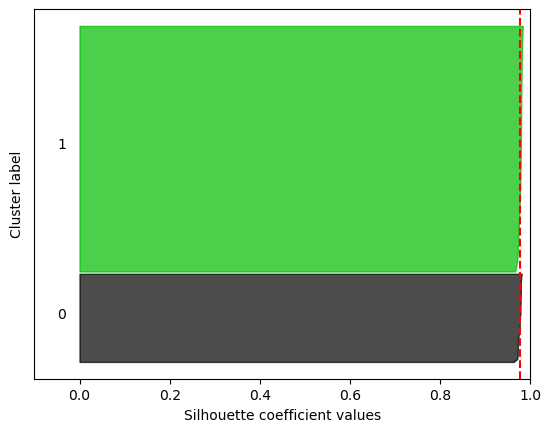

For n_clusters =  3 , the average silhouette_score is:  0.5531251461890209


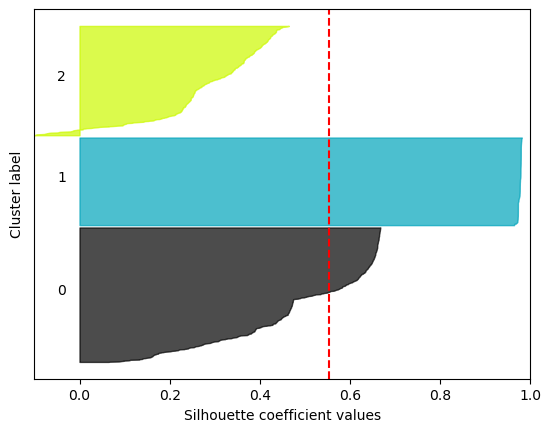

For n_clusters =  4 , the average silhouette_score is:  0.4195947612300067


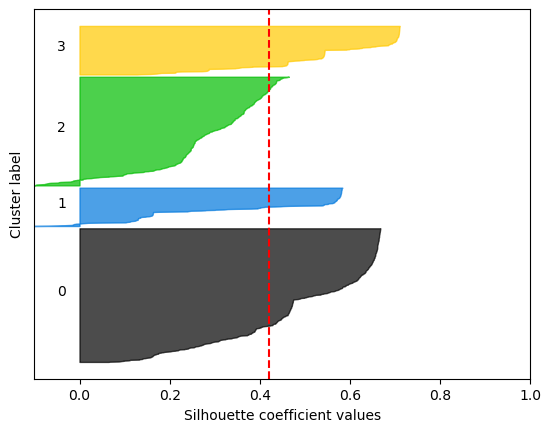

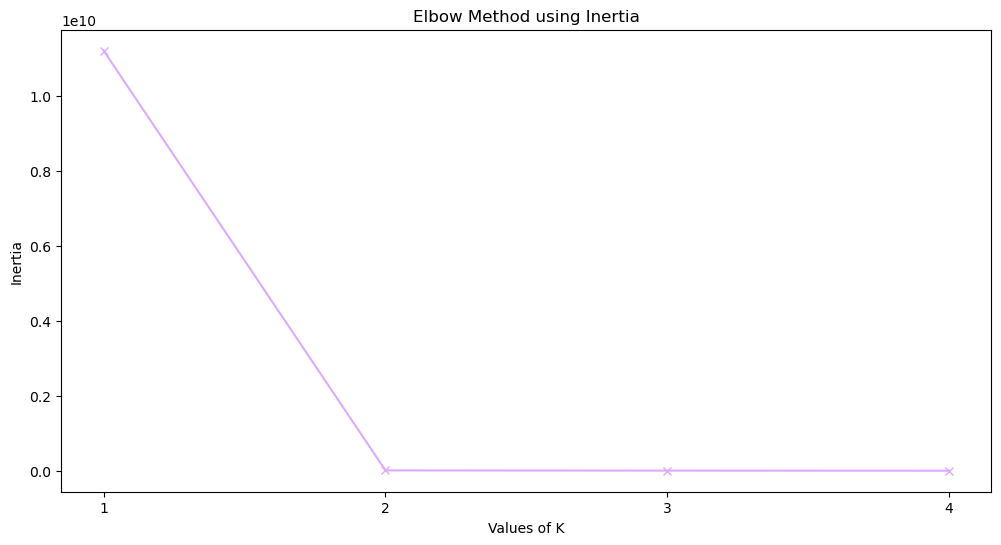

In [83]:
inertias = [] 

for n_clusters in range(1, 5):

    # elbow method
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(df.drop(target_col, axis=1))
    labels = kmeans.labels_ 
    inertias.append(kmeans.inertia_) 

    # silhouette analysis
    if n_clusters!=1:
        # calculating the overall silhouette score
        silhouette_avg = silhouette_score(df, kmeans.labels_)

        print(
        "For n_clusters = ",
        n_clusters,
        ", the average silhouette_score is: ",
        silhouette_avg)

        # calculating the silhouette scores for each data point
        sample_silhouette_values = silhouette_samples(df, kmeans.labels_)

        # plotting the silhouette scores as a horizontal bar chart
        fig, ax = plt.subplots()
        y_lower = 10
        for i in range(n_clusters):
            # aggregating the silhouette scores for samples belonging to cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]

            # sorting the silhouette scores for the samples in this cluster
            ith_cluster_silhouette_values.sort()

            # computing the size of the cluster and set the upper y coordinate for this cluster's silhouette plot
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # creating the color map for the cluster
            color = plt.cm.nipy_spectral(float(i) / n_clusters)

            # plotting the silhouette scores for the samples in this cluster
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            # labelling the silhouette plot with the cluster number
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # computing the new y_lower for the next plot
            y_lower = y_upper + 10

        # setting the plot parameters
        ax.set_xlabel("Silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        # clearing the yaxis labels / ticks
        ax.set_yticks([])  

        ax.set_xlim([-0.1, 1])

        plt.show()

# plotting Elbow method using Inertia
plt.figure(figsize=(12,6))
plt.plot(range(1, 5), inertias, 'bx-',color=custom_colors[1]) 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.xticks(range(1, 5))
plt.title('Elbow Method using Inertia') 
plt.show() 

In [78]:
# performing k-means with the number of clusters specified as 2
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state= 42)
kmeans.fit(df.drop(target_col, axis=1))

KMeans(n_clusters=3, random_state=42)

In [79]:
# combining all the relevant columns
combined_df = pd.concat([df.reset_index(drop=True), pd.DataFrame(kmeans.labels_, columns=['Cluster'])], axis=1)
combined_df.head()

,"Q1r1 - To begin, what is your age?","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage",...,Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Almost never,Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Always (close to 100% of the time),Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Frequently (between 50% and 75% of the time),Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?_Rarely (10%-50% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Almost always (greater than 75% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Almost never,Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Always (close to 100% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Frequently (between 50% and 75% of the time),Q73r13 - Play video games - Which are things you typically do while watching your home television system?_Rarely (10%-50% of the time),Cluster
0,26.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,2
1,25.0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,16.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,32.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2


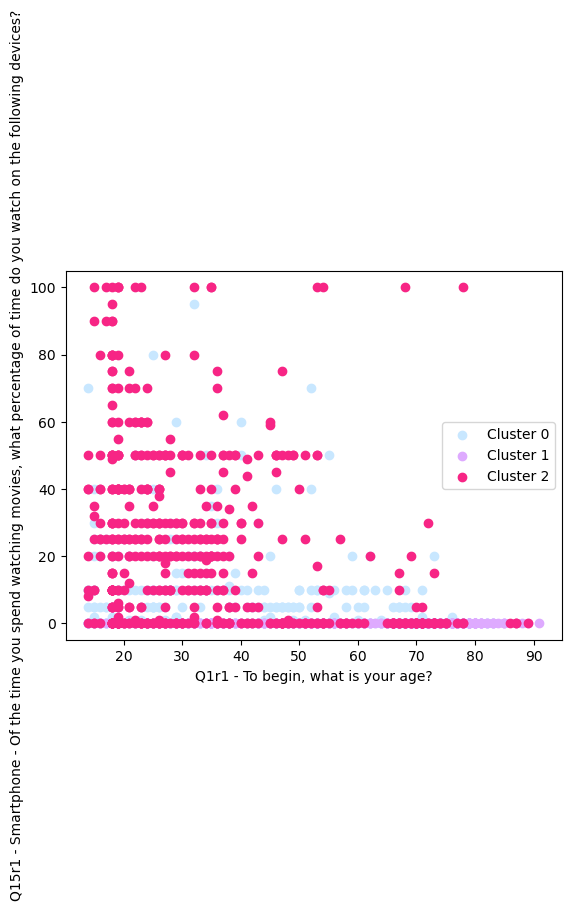

In [81]:
# plotting 2 health outcome columns by cluster
fig, ax = plt.subplots()

col1 = 'Q1r1 - To begin, what is your age?'
col2 = 'Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?'

for i, group in combined_df.groupby('Cluster'):
    ax.scatter(group[col1], group[col2], color=custom_colors[i], label=f'Cluster {i}')

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

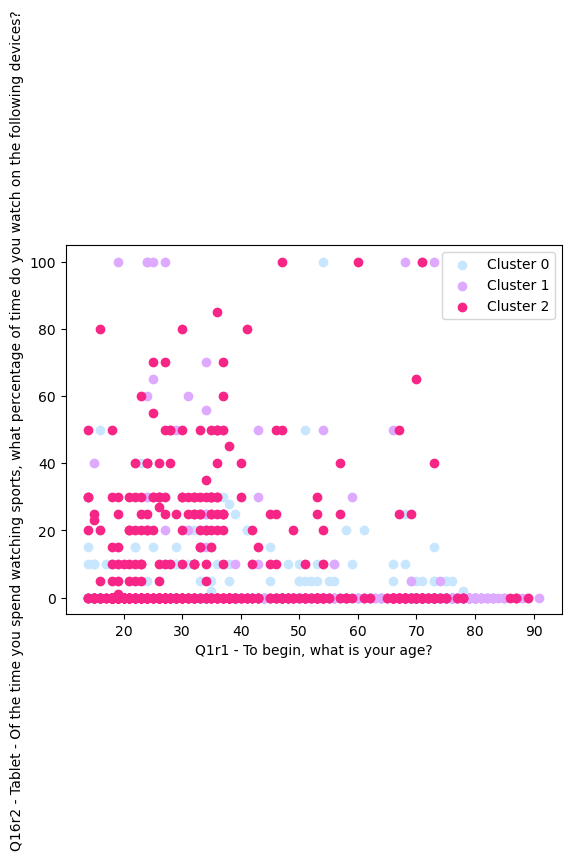

In [82]:
# plotting 2 health outcome columns by cluster
fig, ax = plt.subplots()

col1 = 'Q1r1 - To begin, what is your age?'
col2 = 'Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?'

for i, group in combined_df.groupby('Cluster'):
    ax.scatter(group[col1], group[col2], color=custom_colors[i], label=f'Cluster {i}')

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()